In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/gra

In [ ]:
from manim import *
import sympy as sp

In [ ]:
sp.init_printing(use_unicode=True)
def eom():
    h, s, v, gam, u = sp.symbols('h s v gamma u')
    D, L, m, g, R_M, rho, beta, LD = sp.symbols('D L m g R_M rho beta LD')

    D_exp = rho * v**2 / (2 * beta)
    L_exp = rho * v**2 / (2 * beta) * LD


    eqns = [v * sp.sin(gam),  # dh/dt
            v * sp.cos(gam),  # ds/dt
            -D - g*sp.sin(gam),  # dV/dt
            ((1/v)*(v**2 * sp.cos(gam)/(R_M+h) + L*sp.cos(u)/m - g*sp.cos(gam)))]

    replacements = {L: '{{L}}', D: '{{D}}', g: '{{g}}', R_M: '{{R_M}}', u: '{{u}}',}
    return [h, s, v, gam], [sp.latex(e, symbol_names=replacements) for e in eqns], D_exp, L_exp

# a = eom()
# for eqn in a[1]:
#   sp.print_latex(eqn)

In [ ]:
def create_section_title(title):
        titlebar = Text(title) \
                    .scale(0.75) \
                    .to_edge(LEFT, buff=0.5) \
                    .to_edge(DOWN, buff=0.2)

        titlebar_box = Rectangle(color=BLUE, 
                                 width=config.frame_width,
                                 height=0.75,
                                 fill_opacity=1) \
                        .to_edge(DOWN, buff=0)        
        titlebar.move_to(titlebar_box, ORIGIN).to_edge(LEFT, buff=0.5).to_edge(DOWN, SMALL_BUFF)
        section_titlebar = Group(titlebar_box, titlebar)
        return section_titlebar

def create_slide_title(title: str):
    return Text(title, color=YELLOW).scale(0.75).to_corner(UL, buff=0.5)

def create_slide_content(title: str, content):
    slide_title = create_slide_title(title)
    slide_content = VGroup(slide_title, content).arrange(DOWN, buff=0.5)
    return slide_content.to_corner(UL, buff=0.5)

In [ ]:
%%manim DynamicModelPage1_States

from manim.mobject.geometry import ArrowTriangleFilledTip

# config.pixel_height = 480
# config.pixel_width = 852
# config.quality = 'low_quality'

from math import sin, cos, tan, pi

planet_center = 2*RIGHT + 12*DOWN # absolute coordinates
planet_radius = 10
aeroshell_center = 2.5*UP+2*RIGHT # absolute coordinates
downrange_angle = 20*pi/180
fpa = -15 * pi/180


def create_aeroshell_image():
    return ImageMobject('msl-aeroshell.png', invert=True)\
                            .shift(0.05*UP-0.2*RIGHT)\
                            .scale(0.33) \
                            .rotate(TAU/2)

def create_altitude_line():
    return DashedLine(aeroshell_center, 
                            aeroshell_center + 4.5*DOWN, 
                            dashed_ratio=0.5, 
                            color=GREY)

def create_lander_with_animation(lander_final_pos):
    lander_rotate_angle = -60*pi/180
    lander_final_scale = 0.25

    lander_path = ArcBetweenPoints(aeroshell_center,
                                    lander_final_pos,
                                    angle=-pi/3,
                                    color=GREY_C,
                                    stroke_opacity=0.5)

    lander = create_aeroshell_image()

    fake_lander = lander.copy().scale(0.)
    lander_path_tracker = MoveAlongPath(fake_lander, lander_path)
    scale_tracker = ValueTracker(1.0)
    angle_tracker = ValueTracker(0.0)
    lander_img = lander[0].get_pixel_array()

    def lander_updater(lnd):
        scale = scale_tracker.get_value()
        angle = angle_tracker.get_value()
        pos = fake_lander.get_center()
        return lnd.become(create_aeroshell_image() \
                            .scale(scale) \
                            .rotate(angle)\
                            .move_to(pos))

    lander.add_updater(lander_updater)
    
    lander_flight = AnimationGroup(
        lander_path_tracker,
        scale_tracker.animate().set_value(lander_final_scale),
        angle_tracker.animate().set_value(lander_rotate_angle)
    )
    return lander, lander_flight

class DynamicModelPage1_States(Scene):
    """Shows and explains states in the 2DOF dynamic model"""

    def create_aeroshell(self):
        aeroshell_img = create_aeroshell_image()
        aeroshell_cg = Dot(ORIGIN, color=RED, radius=0.04)
        aeroshell = Group(aeroshell_img, aeroshell_cg)\
                            .shift(aeroshell_center)
        return aeroshell

    def add_planet_surface(self):
        if getattr(self, 'planet_surface', None) is not None:
            self.remove(self.planet_surface)
        planet_edge = Arc(planet_radius, 135*pi/180, -90*pi/180, 
                             arc_center=planet_center + 3*DOWN,
                             color=RED_C)
        planet_label = Text('Surface of planet').scale(0.5) \
                                .shift(2*RIGHT + 5.5*DOWN) # 2.5 to show
        planet_surface = Group(planet_edge, planet_label)
        self.add(planet_surface)
        return planet_surface

    
    def add_altitude_desc(self):
        alt_line = create_altitude_line()
        alt_brace = Brace(alt_line, LEFT, color=GREY)
        alt_label = alt_brace.get_tex(r"\text{Altitude }", r"h")    \
                            .set_stroke_opacity(0.5)
        alt_label.set_color_by_tex('h', YELLOW)
        altitude_desc = Group(alt_line, alt_brace, alt_label)
        self.add(altitude_desc)
        return altitude_desc

    def create_velocity_vector(self):
        velocity_vec = Vector(direction=[3*cos(fpa), 3*sin(fpa), 0], color=GREY) \
                    .shift(aeroshell_center)
        velocity_label = Group(
                            Tex(r'$\vec{v}$').scale(0.7) \
                            .set_color(GREY_A)
                        ) \
                        .arrange(DOWN, buff=0.1)\
                        .next_to(velocity_vec, DOWN, buff=0.1) \
                        .shift(0.35*UP)
        velocity_vector = Group(velocity_vec, velocity_label)
        return velocity_vector

    def add_velocity_desc(self):
        velocity_vec = self.create_velocity_vector()

        velocity_label = velocity_vec[1]
        velocity_mag = MathTex(r'v = |\vec{v}|') \
                            .set_color(YELLOW) \
                            .next_to(velocity_label, DOWN)
        velocity_desc = velocity_mag
        self.add(velocity_desc)
        return Group(velocity_vec, velocity_desc)
    
    def add_fpa_desc(self):
        local_horizon = self.create_local_horizon()
        velocity_vec = self.create_velocity_vector()

        fpa_arc = Arc(2.0, 0.0, fpa, arc_center=aeroshell_center, color=YELLOW)
        fpa_label = MathTex(r'\gamma', color=YELLOW) \
                        .scale(0.8) \
                        .next_to(fpa_arc, RIGHT, buff=0.1)
        fpa_desc = Group(local_horizon, velocity_vec, fpa_arc, fpa_label)

        self.add(fpa_desc)
        return fpa_desc

    def add_downrange_desc(self):
        # Downrange
        alt_line = create_altitude_line()

        downrange_arc = Arc(radius = planet_radius + 0.5, 
                            arc_center = planet_center,
                            start_angle = pi/2, angle = -downrange_angle,
                            color = YELLOW_D) \
                        .add_tip(at_start=True, tip_shape=ArrowTriangleFilledTip) \
                        .add_tip(tip_shape=ArrowTriangleFilledTip)

        downrange_dir_vec = np.array([cos(pi/2-downrange_angle), 
                                        sin(pi/2-downrange_angle), 0])
        downrange_line = DashedLine(
            planet_center + downrange_dir_vec * planet_radius,
            planet_center + downrange_dir_vec *(planet_radius + 3),
            dashed_ratio = 0.5,
            color=GREY
        )

        downrange_label_dir = np.array([cos(pi/2-downrange_angle/2), 
                                        sin(pi/2-downrange_angle/2), 0])
        downrange_label = MathTex('s', color=YELLOW) \
                    .move_to(planet_center) \
                    .shift(downrange_label_dir * (planet_radius + 0.75))
        
        # Lander
        lander_final_pos = planet_center \
                     + downrange_dir_vec * (planet_radius + 1) \
                     + 0.2*LEFT + 0.2*DOWN
        lander, lander_anim = create_lander_with_animation(lander_final_pos)
        
        downrange_desc = Group(alt_line, 
                               downrange_arc, 
                               downrange_line, 
                               downrange_label,
                         )
        return downrange_desc, lander, lander_anim, AnimationGroup(
            Create(alt_line),
            GrowFromCenter(downrange_arc),
            FadeIn(downrange_line),
            FadeIn(downrange_label)
        )


    def create_local_horizon(self):
        horizon_line = DashedLine(aeroshell_center,
                                  aeroshell_center+4*RIGHT,
                                  dash_length=0.4,
                                  dashed_ratio=0.6, color=GREY_D)
        horizon_label = Text('Local Horizon') \
                            .next_to(horizon_line, UP, buff=0.05) \
                            .scale(0.3) \
                            .shift(1.0*RIGHT)
        local_horizon = Group(horizon_line, horizon_label)
        return local_horizon

    def add_highlight_to_state(self, state_list, idx):
        """User's responsibility to get rid of box"""        
        box = SurroundingRectangle(state_list.get_rows()[idx])
        state_list.add(box)
        return box

    def construct(self):
        states = ['h', 's', 'v', r'\gamma']
        state_list = Matrix([[x] for x in states])
        slide_text = MathTex(r'\textbf{x} =')

        state_def = VGroup(slide_text, state_list) \
                    .arrange(RIGHT, buff=0.5)
        
        # Show aeroshell and planet
        aeroshell = self.create_aeroshell()
        planet = self.add_planet_surface()

        # Add first to be at bottom layer before title
        self.add(planet)

        section_title = create_section_title('2DOF Dynamic Model')
        
        # # Used for testing
        # self.add(aeroshell)
        # self.add(planet.shift(3*UP), aeroshell)
        
        # Section title
        self.play(FadeIn(section_title, shift=RIGHT), runtime=0.5)
        self.wait(1)

        slide_content = create_slide_content('States', state_def)
        self.play(Write(slide_content))

        self.play(FadeIn(aeroshell), planet.animate().shift(3*UP))
        
        self.wait(2)
        
        # Altitude
        box = self.add_highlight_to_state(state_list, 0)
        alt_desc = self.add_altitude_desc()
        self.play(Create(box), FadeIn(alt_desc))
        self.wait(3)
        self.play(FadeOut(box), FadeOut(alt_desc))
        state_list.remove(box)
        self.remove(box)

        # Downrange
        box = self.add_highlight_to_state(state_list, 1)
        s_desc, lander, lander_anim, s_desc_anim = self.add_downrange_desc()
        self.add(lander)
        self.play(Create(box), lander_anim, runtime=1.0)
        self.play(s_desc_anim)
        self.wait(3)
        self.play(FadeOut(box), FadeOut(lander), FadeOut(s_desc))
        state_list.remove(box)
        self.remove(box)
        
        # Velocity
        box = self.add_highlight_to_state(state_list, 2)
        vel_desc = self.add_velocity_desc()
        self.play(Create(box), FadeIn(vel_desc))
        self.wait(3)
        self.play(FadeOut(box), FadeOut(vel_desc))
        state_list.remove(box)
        self.remove(box)

        # FPA
        box = self.add_highlight_to_state(state_list, 3)
        fpa_desc = self.add_fpa_desc()
        self.play(Create(box), FadeIn(fpa_desc))
        self.wait(3)
        self.play(FadeOut(box), FadeOut(fpa_desc))
        state_list.remove(box)
        self.remove(box)

        # Clean up
        self.wait(1)
        self.play(FadeOut(planet), FadeOut(aeroshell), FadeOut(slide_content), FadeOut(section_title, shift=LEFT))
        self.wait(2)


[08/20/21 04:31:43] INFO     Writing "v" to                            ]8;id=752243;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/4816f538966d79c6.tex

[08/20/21 04:31:44] INFO     Writing "\gamma" to                       ]8;id=904468;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/e8540287c5dd93ae.tex

                    INFO     Writing "[ ]" to                          ]8;id=925571;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/9070a8eca31b244d.tex

[08/20/21 04:31:45] INFO     Writing "[" to                            ]8;id=180912;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/f1e3d12823d58b6e.tex

                    INFO     Writing "]" to                            ]8;id=643293;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/1a7db82a59b2ec69.tex

                    INFO     Writing "\textbf{x} =" to                 ]8;id=907200;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/fb93d0543de2c8d7.tex

OSError: ignored

In [ ]:
%%manim Intro_BankAngle

from manim.mobject.geometry import ArrowTriangleFilledTip
from math import sin, cos, tan, pi
# config.pixel_height = 480
# config.pixel_width = 852
# config.quality = 'low_quality'

def load_c172_image():
    return ImageMobject('C172.png', invert=False) \
                            .scale(0.5)

def create_bank_angle_tracker(initial_angle, lift_vec, rotation_center):
    theta_tracker = ValueTracker(0.0001)
    line1 = DashedLine(ORIGIN, 2*UP)
    line_moving = lift_vec # Line(ORIGIN, UP, stroke_opacity=0.)

    line_ref = line_moving.copy()
    line_moving.rotate(
        theta_tracker.get_value() * DEGREES, about_point=rotation_center
    )
    a = Angle(line1, line_moving, radius=0.5, other_angle=False)
    tex = MathTex(r"\theta").move_to(
        Angle(
            line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
        ).point_from_proportion(0.5)
    )

    l_text = Tex(r"L").move_to(lift_vec.get_end()+ 0.3*UP)
    l_text.add_updater(lambda x: x.move_to(lift_vec.get_end()+0.3*UP))
    bank_angle = Group(line1, line_moving, a, tex, l_text)

    def lift_vec_updater(vec):
        angle = theta_tracker.get_value() * DEGREES
        if abs(angle) < 0.0001 * DEGREES: 
            angle = 0.0001 * np.sign(angle)
        return vec.become(line_ref.copy()).rotate(
            angle, about_point=rotation_center
        )

    line_moving.add_updater(lift_vec_updater)

    def angle_updater(a):
        angle = theta_tracker.get_value() * DEGREES
        try:
            return a.become(Angle(line1, line_moving, radius=0.5, other_angle=angle < 0))
        except:
            return a

    a.add_updater(angle_updater)
    def tex_updater(t):
        angle = theta_tracker.get_value() * DEGREES
        if abs(angle) < 5 * DEGREES:
            return t.set_stroke_opacity(0.)
        else:
            return t.move_to(
                Angle(
                    line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=angle < 0
                ).point_from_proportion(0.5)
            ).set_stroke_opacity(1.0)

    tex.add_updater(tex_updater)

    return theta_tracker, bank_angle
        
class Intro_BankAngle(Scene):
    def construct(self):
        section_title = create_section_title("Lift Modulation")
        self.play(FadeIn(section_title, shift=RIGHT), runtime=0.5)

        g_vec = Vector(2*DOWN, color=RED)
        
        c172 = load_c172_image()
        lift_vec = Vector(2*UP, color=GREEN)
        self.add(c172, lift_vec)
        
        bank_angle_tracker, bank_angle = create_bank_angle_tracker(0, lift_vec, rotation_center=ORIGIN)

        def plane_rotater(p):
            angle = bank_angle_tracker.get_value() * DEGREES
            return p.become(load_c172_image().rotate(
                angle, about_point=ORIGIN
            ))

        c172.add_updater(plane_rotater)
        self.add(g_vec)
        self.add(Tex(r'W').move_to(g_vec.get_end()+0.5*RIGHT))

        self.add(bank_angle)

        self.wait(2)
        self.play(bank_angle_tracker.animate.set_value(45))
        self.wait(2)
        self.play(bank_angle_tracker.animate.set_value(-45))
        self.wait(2)
        self.play(bank_angle_tracker.animate.set_value(-0.0001), FadeOut(bank_angle[3]))
        self.wait(1)



[08/15/21 04:29:18] INFO     Animation 0 : Using cached data (hash :    ]8;id=216800;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:109
                             450974505_3749468715_1333405370)

                    INFO     Writing "\theta" to                       ]8;id=896237;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/26ec1c2309a05843.tex

[08/15/21 04:29:19] INFO     Writing "L" to                            ]8;id=867520;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/6ae8da9ff6dade3d.tex

                    INFO     Writing "W" to                            ]8;id=752787;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/9a96a7f5ce3c535a.tex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


[08/15/21 04:29:24] INFO     Animation 1 : Partial movie file        ]8;id=158820;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/Intro_Ba                         
                             nkAngle/34786186_1473040613_2231358292.                         
                             mp4'

Animation 2: _MethodAnimation(ValueTracker):  30%|███       | 18/60 [00:02<00:05,  7.23it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


[08/15/21 04:29:35] INFO     Animation 2 : Partial movie file        ]8;id=59583;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/Intro_Ba                         
                             nkAngle/34786186_3989301382_1632383490.                         
                             mp4'

[08/15/21 04:29:39] INFO     Animation 3 : Partial movie file        ]8;id=150009;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/Intro_Ba                         
                             nkAngle/34786186_1473040613_3651756253.                         
                             mp4'

Animation 4: _MethodAnimation(ValueTracker):  48%|████▊     | 29/60 [00:04<00:04,  6.73it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


[08/15/21 04:29:50] INFO     Animation 4 : Partial movie file        ]8;id=620067;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/Intro_Ba                         
                             nkAngle/34786186_2119685806_92839569.mp                         
                             4'

[08/15/21 04:29:55] INFO     Animation 5 : Partial movie file        ]8;id=682775;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/Intro_Ba                         
                             nkAngle/34786186_1473040613_1416769812.                         
                             mp4'

Animation 6: _MethodAnimation(ValueTracker), etc.:   0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
Animation 6: _MethodAnimation(ValueTracker), etc.:  72%|███████▏  | 43/60 [00:07<00:03,  5.05it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


[08/15/21 04:30:06] INFO     Animation 6 : Partial movie file        ]8;id=28446;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/Intro_Ba                         
                             nkAngle/34786186_2585477098_3187989226.                         
                             mp4'

[08/15/21 04:30:09] INFO     Animation 7 : Partial movie file        ]8;id=344199;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/Intro_Ba                         
                             nkAngle/34786186_1463730870_3821912921.                         
                             mp4'

                    INFO                                             ]8;id=140575;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/content/media/videos/co                         
                             ntent/1080p60/Intro_BankAngle.mp4'

                    INFO     Rendered Intro_BankAngle                            ]8;id=201867;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py\scene.py]8;;\:234
                             Played 8 animations

In [ ]:
%%manim DynamicModel2_EOMs

from manim.mobject.geometry import ArrowTriangleFilledTip
from math import sin, cos, tan, pi

class DynamicModel2_EOMs(Scene):
    def construct(self):
        section_title = create_section_title('2DOF Dynamic Model')
        slide_title = create_slide_title('Equations of Motion')

        eom_dxdt = [r'dh \over dt',
                 r'ds \over dt',
                 r'dv \over dt',
                 r'd\gamma \over dt',
                 ]
        eqns = [
            r'v \sin{\gamma}',
            r'v \cos{\gamma}',
            r' -{{D/m}} - {{g}} \sin(\gamma)',
            r'{1 \over v} \left({v^2 \cos(\gamma) \over {{R_M}} + h} + {{L/m}} {{\cos(u)}} - {{g}}\cos(\gamma)\right)'
        ]
        
        dxdt_list = Matrix([[e] for e in eom_dxdt], v_buff=1.5, element_alignment_corner=ORIGIN)\
                        .scale(0.6) \

        dxdt_entries = dxdt_list.get_entries()

        dxdt_brace = Brace(dxdt_list, UP)
        dxdt_brace_label = dxdt_brace.get_tex(r'\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x}, u, t)') \
                                    .scale(0.7)
        dxdt_def = Group(dxdt_brace, dxdt_list, dxdt_brace_label) \
                    .next_to(slide_title, DOWN)
        
        eom_list = Matrix([[e] for e in eqns], v_buff=1.5, element_alignment_corner=ORIGIN)\
                        .scale(0.6) \

        # Repeat brace
        eom_brace = Brace(eom_list, UP)
        eom_brace_label = eom_brace.get_tex(r'\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x}, u, t)') \
                                    .scale(0.7)
        eom_def = Group(eom_brace, eom_list, eom_brace_label) \
                    .next_to(slide_title, DOWN)
        for e in eom_list.get_entries():
            e.set_opacity(0.0)

        DM_expr = MathTex(r"D/m", r"= ", r"\rho",  r"V^2 / (2", r"\beta", r")") \
                    .next_to(eom_def, RIGHT, 1.5)
        LM_expr = MathTex(r"L/m", r"= ", r"(",r"L/D",r")", r"\rho V^2 / (2\beta)") \
                    .next_to(DM_expr, DOWN, aligned_edge=LEFT) \
                    .align_to(DM_expr, LEFT)
        subexpr = Group(DM_expr,
                        LM_expr,
                    ) \
                    .scale(0.8)

        rho_expr = MathTex(r"\rho", r"=", r"\rho_0", r"\exp(-h/",r"H",r")") \
                    .align_to(LM_expr, LEFT)
        rho0_val = MathTex(r"\rho_0", r"&= 0.02 \text{kg/m$^3$}\\") \
                    .next_to(rho_expr, DOWN) \
                    .align_to(rho_expr, LEFT)
        H_val = MathTex(r"H", r"&= 11.1 \text{km}") \
                    .next_to(rho0_val, DOWN) \
                    .align_to(rho0_val, LEFT)

        g_val = MathTex(r"g", r"&= 3.73 \text{ m/s$^2$}\\") \
                    .next_to(H_val, DOWN) \
                    .align_to(H_val, LEFT)
        RM_val = MathTex(r"R_M", r"&= 3380 \text{ km}\\") \
                    .next_to(g_val, DOWN) \
                    .align_to(g_val, LEFT)
        
        planet_expr = Group(rho_expr, 
                            rho0_val,
                            H_val,
                            g_val, 
                            RM_val,
                            ) \
                        .scale(0.75)
        planet_brace = Brace(planet_expr, RIGHT)
        planet_brace_label = planet_brace.get_tex(r"\text{Environment}").scale(0.8)
        planet_params = Group(planet_expr, planet_brace, planet_brace_label)

        beta_val = MathTex(r"\beta", r"&= 120 \text{ kg/m$^2$ } \\")
        LD_val = MathTex(r"L/D", r"&= 0.24\\") \
                    .next_to(beta_val, DOWN) \
                    .align_to(beta_val, LEFT)

        vehicle_expr = Group(beta_val, 
                            LD_val) \
                        .scale(0.75) \
                        .set_opacity(1.)
        vehicle_brace = Brace(vehicle_expr, RIGHT)
        vehicle_brace_label = vehicle_brace.get_tex(r"\text{Vehicle}")\
                                           .scale(0.8)
        vehicle_params = Group(vehicle_expr, vehicle_brace, vehicle_brace_label)

        
        planet_params.next_to(subexpr, DOWN, aligned_edge=LEFT, buff=0.8) \
                     .align_to(subexpr, LEFT)
        vehicle_params.next_to(planet_params, DOWN, aligned_edge=LEFT, buff=0.8) \
                     .align_to(planet_params, LEFT)

        planet_params.set_opacity(0.)
        vehicle_params.set_opacity(0.)
        desc_box = Group(subexpr, 
                        planet_params,
                        vehicle_params,
                    )\
                    .next_to(eom_def, RIGHT, buff=1.5) \
                    .to_edge(UP, 0.5) \

        eom_entries = eom_list.get_entries()

        # self.add(section_title)
        # self.add(slide_title)
        # self.add(eom_def)
        # self.add(desc_box)

        self.play(FadeIn(section_title, shift=RIGHT), runtime=0.5)
        self.play(FadeIn(slide_title, shift=RIGHT))

        self.play(FadeIn(dxdt_def))
        self.wait(2)
        
        self.play(*[e.animate().set_opacity(0.0) 
                    for e in dxdt_list.get_entries()]
                  , run_time=0.5)
        self.play(ReplacementTransform(dxdt_list, eom_list),
                  ReplacementTransform(dxdt_brace, eom_brace))
        self.play(*[e.animate().set_opacity(1.0) 
                    for e in eom_list.get_entries()], run_time=0.5)
        self.wait(1)

        # Show just D/m
        DM_expr.set_color_by_tex(r"D/m", YELLOW)
        self.play(
            eom_entries[2].animate().set_color_by_tex(r"D/m", YELLOW),
            FadeIn(subexpr[0])
        )
        self.wait(1)

        # Highlight rho and show rho expression
        rho_color = RED_C
        rho_expr.set_color_by_tex(r'\rho', rho_color, substring=False)
        self.play(
            DM_expr.animate().set_color_by_tex(r"\rho", rho_color, substring=False),
            FadeIn(rho_expr)
        )
        self.wait(1)

        # Highlight rho0 and H
        rho0_color = GREEN_C
        H_color = BLUE_C
        beta_color = GREEN_C
        rho0H_cmap = {
            r"\rho_0": rho0_color,
            r"H": H_color,
            r"\beta": beta_color,
        }
        
        rho0_val.set_color_by_tex_to_color_map(rho0H_cmap, substring=False)
        H_val.set_color_by_tex_to_color_map(rho0H_cmap, substring=False)
        beta_val.set_color_by_tex_to_color_map(rho0H_cmap, substring=False)

        self.play(
            rho_expr.animate().set_color_by_tex_to_color_map(rho0H_cmap, substring=False),
            DM_expr.animate().set_color_by_tex_to_color_map(rho0H_cmap, substring=False),
            FadeIn(H_val),
            FadeIn(rho0_val),
            FadeIn(beta_val),
        )
        self.wait(1)

        # # Highlight L/m
        cmap = {r"L/m": YELLOW, r"L": YELLOW, r'L/D': GREEN_A}
        subexpr[1].set_color_by_tex_to_color_map(cmap, substring=False)
        LD_val.set_color_by_tex_to_color_map(cmap, substring=False)
        self.play(
            # Reset colors on previous expr
            DM_expr.animate().set_color(WHITE),
            rho_expr.animate().set_color(WHITE),
            rho0_val.animate().set_color(WHITE),
            H_val.animate().set_color(WHITE),
            beta_val.animate().set_color(WHITE),

            eom_entries[3].animate().set_color_by_tex_to_color_map(cmap, substring=False),
            FadeIn(subexpr[1]), # L/m expr
            FadeIn(LD_val),
        )

        self.wait(1)

        # Highlight u
        
        self.play(
            # Reset colors
            LM_expr.animate().set_color(WHITE),
            LD_val.animate().set_color(WHITE),
            eom_entries[3].animate().set_color_by_tex(r"\cos(u)", RED)
        )

        self.wait(1)

        # Highlight g and R_M
        g_color = MAROON
        RM_color = BLUE
        cmap = {r'g': g_color, r'{{g}}': g_color, r'R_M': RM_color}
        g_val.set_color_by_tex_to_color_map(cmap, substring=False),
        RM_val.set_color_by_tex_to_color_map(cmap, substring=False),
        self.play(
            eom_entries[2].animate().set_color_by_tex_to_color_map(cmap, substring=False),
            eom_entries[3].animate().set_color_by_tex_to_color_map(cmap, substring=False),
            FadeIn(g_val),
            FadeIn(RM_val),
        )

        self.wait(2)


[08/15/21 16:26:35] INFO     Writing "dh \over dt" to                  ]8;id=840922;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/15ea1eed588613fe.tex

                    INFO     Writing "ds \over dt" to                  ]8;id=593531;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/69c283d7ea1c8e06.tex

[08/15/21 16:26:36] INFO     Writing "dv \over dt" to                  ]8;id=973545;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/c52bf731ba2ef94a.tex

                    INFO     Writing "d\gamma \over dt" to             ]8;id=9897;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/e5ef713e2c02cfb9.tex

[08/15/21 16:26:37] INFO     Writing "[ ]" to                          ]8;id=332807;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/9070a8eca31b244d.tex

                    INFO     Writing "[" to                            ]8;id=174550;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/f1e3d12823d58b6e.tex

                    INFO     Writing "]" to                            ]8;id=847428;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/1a7db82a59b2ec69.tex

[08/15/21 16:26:38] INFO     Writing "\mathbf{\dot{x}} =               ]8;id=939661;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \mathbf{f}(\mathbf{x}, u, t)" to                                
                             media/Tex/dd1161c01826300f.tex

                    INFO     Writing "v \sin{\gamma}" to               ]8;id=21348;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/c542d9f82650e1ac.tex

                    INFO     Writing "v \cos{\gamma}" to               ]8;id=320298;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/b4f855367e9e3041.tex

[08/15/21 16:26:39] INFO     Writing "- D/m  -  g  \sin(\gamma)" to    ]8;id=641922;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/463daa2378879c9c.tex

                    INFO     Writing "-" to                            ]8;id=959603;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/6fdc8994b887759a.tex

[08/15/21 16:26:40] INFO     Writing "D/m" to                          ]8;id=37724;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/72077ff29662504e.tex

                    INFO     Writing "g" to                            ]8;id=313662;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/5cb583c5d32b8449.tex

                    INFO     Writing "\sin(\gamma)" to                 ]8;id=592581;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/20a20f5f9e85f192.tex

[08/15/21 16:26:41] INFO     Writing "{1 \over v} \left({v^2           ]8;id=109446;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \cos(\gamma) \over  R_M  + h} +  L/m                            
                             \cos(u)  -  g \cos(\gamma)\right)" to                           
                             media/Tex/ba616da6e2fb6187.tex

                    INFO     Writing "{1 \over v} \big({v^2            ]8;id=159678;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \cos(\gamma) \over}" to                                         
                             media/Tex/c1b2d35500b4ce0a.tex

                    INFO     Writing "R_M" to                          ]8;id=883047;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/4457225b8cd8d027.tex

[08/15/21 16:26:42] INFO     Writing "{+ h} +" to                      ]8;id=331577;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/698ff1fd4c5c6e0c.tex

                    INFO     Writing "L/m" to                          ]8;id=981473;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/676a1e4d5681ec59.tex

[08/15/21 16:26:43] INFO     Writing "\quad" to                        ]8;id=126372;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/541fc535f7ae8538.tex

                    INFO     Writing "\cos(u)" to                      ]8;id=14671;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/6eff636da71c97b1.tex

                    INFO     Writing "\cos(\gamma)\big)" to            ]8;id=444809;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/e875356704a99750.tex

[08/15/21 16:26:44] INFO     Writing "D/m =  \rho V^2 / (2 \beta )" to ]8;id=681808;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/e819adbc2a38d790.tex

                    INFO     Writing "=" to                            ]8;id=709381;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/98b2378b12ae1991.tex

[08/15/21 16:26:45] INFO     Writing "\rho" to                         ]8;id=981743;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/dbccfa708daa4962.tex

                    INFO     Writing "V^2 / (2" to                     ]8;id=511387;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/9603aa9c10074ad6.tex

                    INFO     Writing "\beta" to                        ]8;id=140556;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/c9bd817caeb5fa02.tex

[08/15/21 16:26:46] INFO     Writing ")" to                            ]8;id=34197;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/401d80d1312a9499.tex

                    INFO     Writing "L/m =  ( L/D ) \rho V^2 /        ]8;id=40450;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             (2\beta)" to                                                    
                             media/Tex/ea0fc9527e645039.tex

                    INFO     Writing "(" to                            ]8;id=443894;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/75400e6fa480186b.tex

[08/15/21 16:26:47] INFO     Writing "L/D" to                          ]8;id=733443;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/d0c15632e09c07ef.tex

                    INFO     Writing "\rho V^2 / (2\beta)" to          ]8;id=934848;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/ea17a357cc5e7f89.tex

[08/15/21 16:26:48] INFO     Writing "\rho = \rho_0 \exp(-h/ H )" to   ]8;id=323510;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/953d0a397c9e0683.tex

                    INFO     Writing "\rho_0" to                       ]8;id=472497;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/7cb6f9f03a94a77f.tex

                    INFO     Writing "\exp(-h/" to                     ]8;id=127420;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/626b72cfff5a3386.tex

[08/15/21 16:26:49] INFO     Writing "H" to                            ]8;id=282782;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/1394b03e70979979.tex

                    INFO     Writing "\rho_0 &= 0.02                   ]8;id=213652;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \text{kg/m$^3$}\\" to                                           
                             media/Tex/95de75a2e15e030e.tex

                    INFO     Writing "&= 0.02 \text{kg/m$^3$}\\" to    ]8;id=998191;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/0f77777171f05ccf.tex

[08/15/21 16:26:50] INFO     Writing "H &= 11.1 \text{km}" to          ]8;id=994166;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/d2ff56713afdcb59.tex

                    INFO     Writing "&= 11.1 \text{km}" to            ]8;id=627181;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/195a35a12b0c2b74.tex

[08/15/21 16:26:51] INFO     Writing "g &= 3.73 \text{ m/s$^2$}\\" to  ]8;id=984008;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/0c00ed9e5bc95637.tex

                    INFO     Writing "&= 3.73 \text{ m/s$^2$}\\" to    ]8;id=612056;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/62be4e99e3b3b9a1.tex

                    INFO     Writing "R_M &= 3380 \text{ km}\\" to     ]8;id=560748;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/598191ac6dc5e622.tex

[08/15/21 16:26:52] INFO     Writing "&= 3380 \text{ km}\\" to         ]8;id=792177;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/bfb8b88f45ea222d.tex

                    INFO     Writing "\text{Environment}" to           ]8;id=903443;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/875be54914ab874c.tex

[08/15/21 16:26:53] INFO     Writing "\beta &= 120 \text{ kg/m$^2$ }   ]8;id=109532;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \\" to media/Tex/6f8baeaf08c512a0.tex

                    INFO     Writing "&= 120 \text{ kg/m$^2$ } \\" to  ]8;id=884404;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/2d396665495a9c2f.tex

[08/15/21 16:26:54] INFO     Writing "L/D &= 0.24\\" to                ]8;id=803993;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/204ad95f44fb9693.tex

                    INFO     Writing "&= 0.24\\" to                    ]8;id=593922;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/e7c697588d099360.tex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


                    INFO     Writing "\text{Vehicle}" to               ]8;id=269496;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/d456abd11cf592d9.tex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


[08/15/21 16:26:59] INFO     Animation 0 : Partial movie file        ]8;id=452535;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/450974505_2091895275_1333405                         
                             370.mp4'

[08/15/21 16:27:03] INFO     Animation 1 : Partial movie file        ]8;id=870164;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_4151880853_12090165                         
                             13.mp4'

[08/15/21 16:27:06] INFO     Animation 2 : Partial movie file        ]8;id=5706;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_2630873019_40499812                         
                             49.mp4'

[08/15/21 16:27:11] INFO     Animation 3 : Partial movie file        ]8;id=379019;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1473040613_36551627                         
                             83.mp4'

[08/15/21 16:27:13] INFO     Animation 4 : Partial movie file        ]8;id=16048;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_2239039664_23925363                         
                             27.mp4'

[08/15/21 16:27:20] INFO     Animation 5 : Partial movie file        ]8;id=393307;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1050762262_75366198                         
                             1.mp4'

[08/15/21 16:27:23] INFO     Animation 6 : Partial movie file        ]8;id=770430;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_2103182106_10117623                         
                             83.mp4'

[08/15/21 16:27:26] INFO     Animation 7 : Partial movie file        ]8;id=182425;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1463730870_13065536                         
                             26.mp4'

[08/15/21 16:27:30] INFO     Animation 8 : Partial movie file        ]8;id=339478;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1251860271_92830585                         
                             7.mp4'

[08/15/21 16:27:33] INFO     Animation 9 : Partial movie file        ]8;id=722572;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1463730870_34452171                         
                             8.mp4'

[08/15/21 16:27:37] INFO     Animation 10 : Partial movie file       ]8;id=718982;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_3923915054_12468858                         
                             69.mp4'

[08/15/21 16:27:40] INFO     Animation 11 : Partial movie file       ]8;id=827327;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1463730870_29297163                         
                             7.mp4'

[08/15/21 16:27:45] INFO     Animation 12 : Partial movie file       ]8;id=402777;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_3807888993_35098101                         
                             27.mp4'

[08/15/21 16:27:48] INFO     Animation 13 : Partial movie file       ]8;id=10816;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1463730870_41589198                         
                             26.mp4'

[08/15/21 16:27:55] INFO     Animation 14 : Partial movie file       ]8;id=662569;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_2389632603_19514215                         
                             46.mp4'

[08/15/21 16:27:59] INFO     Animation 15 : Partial movie file       ]8;id=502813;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1463730870_39504816                         
                             5.mp4'

[08/15/21 16:28:05] INFO     Animation 16 : Partial movie file       ]8;id=420263;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_3876663733_21633872                         
                             .mp4'

[08/15/21 16:28:09] INFO     Animation 17 : Partial movie file       ]8;id=334927;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1463730870_19767847                         
                             12.mp4'

[08/15/21 16:28:16] INFO     Animation 18 : Partial movie file       ]8;id=480951;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_424433638_268189551                         
                             0.mp4'

[08/15/21 16:28:22] INFO     Animation 19 : Partial movie file       ]8;id=138190;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/DynamicM                         
                             odel2_EOMs/34786186_1473040613_23446612                         
                             18.mp4'

                    INFO                                             ]8;id=346564;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/content/media/videos/co                         
                             ntent/1080p60/DynamicModel2_EOMs.mp4'

                    INFO     Rendered DynamicModel2_EOMs                         ]8;id=943291;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py\scene.py]8;;\:234
                             Played 20 animations

In [ ]:
%%manim ControlPolicy1_Variation

from manim.mobject.geometry import ArrowTriangleFilledTip
from math import sin, cos, tan, pi

config["background_color"] = BLACK

def make_ref_traj(x0, xf):
    ref_traj_t0 = Dot(x0)
    ref_traj_tf = Dot(xf)
    ref_traj = ArcBetweenPoints(x0, xf, angle=-TAU/6)
    ref_traj_t0_label = MathTex('\mathbf{x_0^*}, t_0^*') \
                                .scale(0.6) \
                                .next_to(ref_traj_t0, DL, 0) \
                                .shift((RIGHT+DOWN)*SMALL_BUFF)
    ref_traj_tf_label = MathTex('\mathbf{x_f^*}, t_f^*') \
                                .scale(0.6) \
                                .move_to(xf + MED_SMALL_BUFF*UL + MED_SMALL_BUFF*LEFT)
    ref_traj_Rf_label = MathTex('R_f^*') \
                                .scale(0.6) \
                                .next_to(ref_traj_tf, DOWN)
    ref_traj_label = Tex(r'Reference\\Trajectory') \
                        .scale(0.6) \
                        .next_to(ref_traj, LEFT) \
                        .shift(1.25*RIGHT)
    return Group(ref_traj_t0, 
                    ref_traj_t0_label,
                    ref_traj_tf,
                    ref_traj_tf_label, 
                    ref_traj_Rf_label, 
                    ref_traj,
                    ref_traj_label,
                    )

def make_pert_traj(x0, xf, xf_pred):
    traj_t0 = Dot(x0)
    traj_tf = Dot(xf)
    traj = ArcBetweenPoints(x0, xf, angle=-TAU/8)
    traj_t0_label = MathTex('\mathbf{x_0}, t_0') \
                                .scale(0.6) \
                                .next_to(traj_t0, UP, buff=SMALL_BUFF)
    traj_tf_label = MathTex('\mathbf{x_f}, t_f') \
                                .scale(0.6) \
                                .move_to(xf + MED_SMALL_BUFF*UR + SMALL_BUFF*RIGHT)
    traj_label = Tex(r'Perturbed\\Trajectory') \
                        .scale(0.6) \
                        .next_to(traj, RIGHT) \
                        .shift(0.75*LEFT + 0.5*UP) \
                        .shift(0.1 * DL)

    return Group(traj_t0, 
                    traj_t0_label,
                    traj_tf,
                    traj_tf_label, 
                    traj_label, 
                    traj
                    )

def make_pert_traj_tail(xf, xf_pred):
    hf_line = DashedLine(xf, xf+abs(xf[1])*DOWN)
    hf_brace = Brace(hf_line, LEFT, stroke_width=0.1)
    
    sf_label = MathTex('s_f') \
                    .scale(0.6) \
                    .next_to(hf_line, DOWN) \
                    .shift(UL*SMALL_BUFF)
    Rf_label = MathTex(r'R_f',r' = s_f + \dot{s_f} dt_f') \
                    .scale(0.6) \
                    .move_to(xf_pred + DOWN*MED_LARGE_BUFF + RIGHT)

    tail = DashedVMobject(ArcBetweenPoints(xf, xf_pred, angle=-TAU/9))
    return Group(hf_line,
                hf_brace,
                hf_brace.get_tex('h_f', buff=0.01).scale(0.5),
                sf_label,
                Rf_label,
                tail
    )

def make_axes(origin, s_len, h_len):
    h_axis = Arrow(origin+MED_SMALL_BUFF*DOWN, origin+h_len*UP)
    h_label = MathTex(r'h').next_to(h_axis, UP, SMALL_BUFF)
    s_axis = Arrow(origin+MED_SMALL_BUFF*LEFT, origin+s_len*RIGHT)
    s_label = MathTex(r's').next_to(s_axis, RIGHT, SMALL_BUFF)
    return Group(h_axis, s_axis), Group(h_label, s_label)


class ControlPolicy1_Variation(Scene):
    def construct(self):
        text_scale = 0.6
        section_title = create_section_title('Minimizing Range Error')
        # slide_title = create_slide_title('Problem Statement')
        
        axes, axes_labels = make_axes(ORIGIN+2*DOWN, 6, 5)

        # Make ref traj
        ref_traj_pts = [0.8*RIGHT+1*UP, 2.5*RIGHT+2*DOWN]
        ref_traj = make_ref_traj(*ref_traj_pts)

        # Make perturbed traj
        pert_traj_pts = [1.25*RIGHT+1.5*UP, 4*RIGHT+1*DOWN, 4.25*RIGHT+2*DOWN]
        
        pert_traj = make_pert_traj(*pert_traj_pts[:2], ORIGIN)
        traj_tail = make_pert_traj_tail(*pert_traj_pts[1:])

        diagram = Group(axes, axes_labels, ref_traj, pert_traj, traj_tail)

        # Add Cost function 
        ocp = MathTex(r'J &= ', r'R_f') \
                        .scale(text_scale) \
                        .to_edge(UP, buff=0.5) \
                        .to_edge(LEFT, buff=1.5)

        # ocp.set_color_by_tex('R_f', YELLOW, substring=False)

        # Show EOMs
        eoms = MathTex(r'\text{s.t: }', '\dot{\mathbf{x}} &= \mathbf{f}(\mathbf{x}, u, t)') \
                .scale(text_scale)
        eoms.next_to(ocp, DOWN, buff=0.25, aligned_edge=LEFT)

        x_bc = MathTex(r'\mathbf{x}(t_0) &= \big[120\text{ km},\;0,\;5.5\text{ km/s},\;-14.5^{\circ}\big] \\',
                       r'h(t_f) &= 0\text{ km}')\
                .scale(text_scale)
        x_bc.next_to(eoms[1], DOWN, buff=0.25, aligned_edge=LEFT) \
            .align_to(ocp, LEFT)

        # Substitude R_f
        ocp_2 = MathTex(r'J &= ',r's_f',r' + \dot{s_f} dt_f') \
                                .scale(text_scale) \
                                .move_to(ocp)


        # Expand d_tf and sfdot
        ocp_3 = MathTex(r'J &= ',r's_f - \cot(\gamma_f) h_f') \
                                .scale(text_scale) \
                                .move_to(ocp)

        phi_brace = Brace(ocp_3[1]).shift(UP*0.15)
        phi_brace_label = phi_brace.get_tex(r'\Phi(\mathbf{x}(t_f))')\
                                    .scale(0.5) \
                                    .shift(0.25*UP)
        phi_label = Group(phi_brace, phi_brace_label)

        arrow = MathTex(r'\Downarrow') \
                    .scale(1.25) \
                    .next_to(x_bc, DOWN, aligned_edge=ORIGIN, buff=0.7) \
                    .shift(1.0*LEFT)

        # Introduce costates
        costates = MathTex(r'\text{Costates: }',
                           r'\mathbf{\lambda}^\intercal = \left[ \lambda_h \: \lambda_s \: \lambda_v \: \lambda_\gamma]'
                        )\
                        .scale(text_scale) \
                        .next_to(x_bc, DOWN, 1.5) \
                        .align_to(ocp_3, LEFT)

        # bvp_1 = MathTex(r"\text{Min } J' &= s_f - \cot{\gamma_f} h_f + \mathbf{\lambda}^\intercal \mathbf{f}") \
        #                         .scale(0.8) \
        #                         .move_to(ocp)
        

        # Costate Equations
        costate_eoms = MathTex(r'\mathbf{\dot{\lambda}} = -\mathbf{\lambda}^\intercal\frac{\partial \mathbf{f}}{\partial \mathbf{x}}') \
                        .next_to(costates[0], DOWN, buff=0.1, aligned_edge=LEFT) \
                        .scale(text_scale) \
                        .shift(LEFT*SMALL_BUFF*2)

        # Costate BCs
        costate_bc = MathTex(r'\mathbf{\lambda}^\intercal(t_f) = {\partial \Phi \over \partial \mathbf{x}(t_f)} = \left[-\cot{\gamma_f}\;\;1\;\;0\;\;0\;\right]')
        costate_bc.next_to(costate_eoms, RIGHT)\
                  .scale(text_scale) \
                  .shift(1*LEFT)

        # Introduce LambdaU and its BC        
        lambda_u_eom = MathTex(r'\dot{\lambda_u} = -\mathbf{\lambda}^\intercal \frac{\partial \mathbf{f}}{\partial u}') \
                        .next_to(costate_eoms, DOWN, buff=0.1, aligned_edge=LEFT) \
                        .scale(text_scale) \
                        .align_to(costate_eoms, LEFT)
        

        lambda_u_bc = MathTex(r'\lambda_u(t_f) = 0') \
                        .next_to(costate_eoms, RIGHT)\
                        .align_to(lambda_u_eom, UP) \
                        .scale(text_scale) \
                        .shift(RIGHT*0.1) \
                        # .next_to(lambda_u_eom, RIGHT)\
        
        x_bc_2 = MathTex(r'\mathbf{x}(t_0) &= \mathbf{X}_0 \\ h(t_f) &= 0') \
                    .scale(text_scale)\
                    .next_to(lambda_u_eom, DOWN, aligned_edge=LEFT)
        

        # self.add(section_title)
        # self.add(axes)
        # self.add(ref_traj)
        # self.add(pert_traj)
        # self.add(traj_tail)
        # self.remove(*diagram)
        # self.add(ocp_3)
        # eoms.next_to(phi_label, DOWN, buff=0.25).align_to(ocp_3, LEFT)
        # x_bc.next_to(eoms[1], DOWN, buff=0.25, aligned_edge=LEFT)

        # self.add(phi_label)
        # self.add(eoms)
        # self.add(x_bc)
        # self.add(arrow)
        # self.add(costates)
        # self.add(costate_eoms)
        # self.add(costate_bc)
        # self.add(lambda_u_eom)
        # self.add(lambda_u_bc)
        # self.add(x_bc_2)

        # 13 - 45    
        self.play(FadeIn(section_title, shift=RIGHT), runtime=0.5)
        
        # Show diagram
        self.play(FadeIn(axes), FadeIn(axes_labels), FadeIn(ref_traj))
        self.wait(65)

        self.play(FadeIn(pert_traj))
        self.wait(30)
        self.play(FadeIn(traj_tail))
        self.wait(10)
        self.play(FadeIn(ocp, eoms, x_bc),
                  traj_tail[4].animate().set_color_by_tex('R_f', YELLOW, substring=False),
                  ocp.animate().set_color_by_tex('R_f', YELLOW, substring=False)
                  )
        
        self.wait(2)

        self.play(ocp.animate().become(ocp_2),
                  traj_tail[4].animate().set_color(WHITE))
        self.wait(1)

        # Add "phi" label 
        self.play(ocp.animate().become(ocp_3), 
                  FadeIn(phi_label), 
                  eoms.animate().next_to(phi_label, DOWN, buff=0.25).align_to(ocp_3, LEFT),
                  x_bc.animate().next_to(phi_label, DOWN, buff=0.60).align_to(ocp_3, LEFT)
        )
        self.wait(2)

        # Needs to be done here because of respositioning of x_bc
        ocp_all = Group(ocp, eoms, x_bc)
        ocp_label_brace = Brace(ocp_all, RIGHT)
        ocp_label = Group(ocp_label_brace, ocp_label_brace.get_text(r'Optimal Control Problem').scale(0.8))

        bvp = Group(costates, costate_eoms, costate_bc, lambda_u_bc, lambda_u_eom, x_bc_2)
        bvp_label_brace = Brace(bvp, RIGHT)
        bvp_label = Group(bvp_label_brace, bvp_label_brace.get_text(r'Boundary Value Problem').scale(0.8))
        ocp_label.align_to(bvp_label, LEFT)
        arrow.next_to(bvp_label, UP, buff=0.5)
        # self.add(bvp_label_brace, bvp_label, ocp_label_brace, ocp_label, arrow)

        self.play(FadeOut(diagram), FadeIn(ocp_label))
        self.wait(20)
        self.play(FadeIn(arrow), FadeIn(bvp_label))
        self.wait(20)
        self.play(FadeIn(costates))
        self.wait(10)
        self.play(FadeIn(costate_eoms), FadeIn(costate_bc))
        self.wait(10)

        self.play(FadeIn(lambda_u_eom), FadeIn(lambda_u_bc))
        self.wait(2)
        self.play(FadeIn(x_bc_2))

        self.wait(10)


[08/20/21 04:33:31] INFO     Animation 0 : Using cached data (hash :    ]8;id=693337;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:109
                             450974505_974863376_1333405370)

[08/20/21 04:33:32] INFO     Animation 1 : Using cached data (hash :    ]8;id=459787;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:109
                             34786186_3401698180_99726069)

                    INFO     Animation 2 : Using cached data (hash :    ]8;id=977530;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:109
                             34786186_1268002213_3759717056)

                    INFO     Animation 3 : Using cached data (hash :    ]8;id=502573;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:109
                             34786186_1386505692_353481385)

[08/20/21 04:33:33] INFO     Animation 4 : Using cached data (hash :    ]8;id=805214;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:109
                             34786186_3890670832_2139919101)

                    INFO     Animation 5 : Using cached data (hash :    ]8;id=294687;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:109
                             34786186_1340118127_1539091615)

[08/20/21 04:33:53] INFO     Animation 6 : Partial movie file        ]8;id=630491;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3403906360_11                         
                             92629957.mp4'

[08/20/21 04:33:58] INFO     Animation 7 : Partial movie file        ]8;id=776463;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_1836796827_30                         
                             12517902.mp4'

[08/20/21 04:34:03] INFO     Animation 8 : Partial movie file        ]8;id=886210;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_1473040613_26                         
                             22226710.mp4'

[08/20/21 04:34:09] INFO     Animation 9 : Partial movie file        ]8;id=523748;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3259149925_41                         
                             70590230.mp4'

[08/20/21 04:34:12] INFO     Animation 10 : Partial movie file       ]8;id=118516;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_1463730870_14                         
                             21466251.mp4'

[08/20/21 04:34:19] INFO     Animation 11 : Partial movie file       ]8;id=709429;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_666984064_287                         
                             2685459.mp4'

[08/20/21 04:34:25] INFO     Animation 12 : Partial movie file       ]8;id=327482;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_1473040613_37                         
                             46309712.mp4'

                    INFO     Writing "Optimal Control Problem" to      ]8;id=794822;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/ee767f24551226b3.tex

[08/20/21 04:34:33] INFO     Animation 13 : Partial movie file       ]8;id=791782;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3486223879_35                         
                             81543679.mp4'

[08/20/21 04:35:11] INFO     Animation 14 : Partial movie file       ]8;id=683867;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/2788726626_4049871892_                         
                             2041058707.mp4'

[08/20/21 04:35:15] INFO     Animation 15 : Partial movie file       ]8;id=807167;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3746711459_39                         
                             10339063.mp4'

[08/20/21 04:35:54] INFO     Animation 16 : Partial movie file       ]8;id=341075;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_4049871892_10                         
                             47067212.mp4'

[08/20/21 04:35:58] INFO     Animation 17 : Partial movie file       ]8;id=569114;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_885334146_130                         
                             0305886.mp4'

[08/20/21 04:36:18] INFO     Animation 18 : Partial movie file       ]8;id=249429;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3403906360_30                         
                             56033741.mp4'

[08/20/21 04:36:22] INFO     Animation 19 : Partial movie file       ]8;id=247695;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_1463222753_80                         
                             2877365.mp4'

[08/20/21 04:36:43] INFO     Animation 20 : Partial movie file       ]8;id=576479;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3403906360_65                         
                             2091605.mp4'

[08/20/21 04:36:47] INFO     Animation 21 : Partial movie file       ]8;id=324574;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3548277553_30                         
                             68971144.mp4'

[08/20/21 04:36:52] INFO     Animation 22 : Partial movie file       ]8;id=514937;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_1473040613_16                         
                             33318254.mp4'

[08/20/21 04:36:57] INFO     Animation 23 : Partial movie file       ]8;id=897917;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_53938579_1818                         
                             963014.mp4'

[08/20/21 04:37:17] INFO     Animation 24 : Partial movie file       ]8;id=576849;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy1_Variation/34786186_3403906360_20                         
                             31136680.mp4'

[08/20/21 04:37:18] INFO                                             ]8;id=695336;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/content/media/videos/co                         
                             ntent/1080p60/ControlPolicy1_Variation.                         
                             mp4'

                    INFO     Rendered ControlPolicy1_Variation                   ]8;id=754374;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py\scene.py]8;;\:234
                             Played 25 animations

In [ ]:
%%manim ControlPolicy2

from manim.mobject.geometry import ArrowTriangleFilledTip
from math import sin, cos, tan, pi

def transform_equations(scene, eqn1, eqn2, indices, runtime=1.0):
    """match indices in multipart equations to transform between them"""

    assert len(eqn1) == len(eqn2), "Equations shold have same number of terms"+str(len(eqn1))+"!="+str(len(eqn2))
    new_copies = []
    animations = []
    a1 = []   # Delete old terms
    a2 = []   # Rearrange old terms
    a3 = []   # Bring in new terms
    for i in range(len(eqn1)):
        # new_copy = eqn2[i].copy().move_to(eqn1[i])
        if i in indices:
            a1.append(FadeOut(eqn1[i], shift=UP))
            a3.append(FadeIn(eqn2[i]))
        else:
            a2.append(ReplacementTransform(eqn1[i], eqn2[i]))

    return AnimationGroup(*a1), AnimationGroup(*a2), AnimationGroup(*a3)

class ControlPolicy2(Scene):
    def construct(self):
        section_title = create_section_title('Minimizing Range Error')
        slide_title = create_slide_title('Apollo Guidance Control Law')
        self.play(FadeIn(section_title, shift=RIGHT), runtime=0.5)
        self.play(FadeIn(slide_title, shift=RIGHT))

        # self.add(section_title)
        # self.add(slide_title)

        F1_expr = r'{H\lambda_h^*(v) \over \big( {D^* \over m}(v) \big)}'
        F2_expr = r'{\lambda_\gamma^*(v) \over v^* \cos{\gamma^*(v)}}'
        F3_expr = r'\lambda_u^*(v)'
        lamS_expr = r'\lambda_s^*(v)'
        delS_expr = r'\delta s(v)'
        delhdot_expr = r'\delta \dot{h}(v)'
        delDM_expr = r'\delta \big( {D \over m}(v) \big)'

        empty_spaces = [r'{}' for _ in range(13)]
        control_policy_0 = MathTex(r'u(v) = u^*(v) + ', r'\delta u', *empty_spaces)\
                                .scale(0.8) \
                                .to_edge(UP, 2.0) \
                                .set_color_by_tex(r'\delta u', BLUE, substring=False)

        self.add(control_policy_0)
        self.wait(1)

        control_policy_1 = MathTex(r'u(v) = u^*(v) + ',
                                   r'{}', r'{\bigg(',
                                   r'- ', lamS_expr, delS_expr,
                                   r'- ', F2_expr, delhdot_expr,
                                   r'- ', F1_expr, delDM_expr,
                                   r'\bigg) \over ',F3_expr,'}') \
                            .scale(0.8) \
                            .to_edge(UP, 2.0) \
                            .set_color_by_tex(delS_expr, YELLOW) \
                            .set_color_by_tex(delhdot_expr, YELLOW) \
                            .set_color_by_tex(delDM_expr, YELLOW) \
                            .set_color_by_tex(lamS_expr, RED) \
                            .set_color_by_tex(F1_expr, RED) \
                            .set_color_by_tex(F2_expr, RED) \
                            .set_color_by_tex(F3_expr, RED)

        a = transform_equations(self, control_policy_0, control_policy_1, list(range(1,13)))
        self.play(a[0], a[1], a[2])

        self.wait(1)
        control_policy_1a = MathTex(r'u(v) = u^*(v) + ',
                                   r'{}', r'{\bigg(',
                                   r'- ', '1', delS_expr,
                                   r'- ', F2_expr, delhdot_expr,
                                   r'- ', F1_expr, delDM_expr,
                                   r'\bigg) \over ',F3_expr,'}') \
                            .scale(0.8) \
                            .to_edge(UP, 2.0) \
                            .set_color_by_tex(delS_expr, YELLOW) \
                            .set_color_by_tex(delhdot_expr, YELLOW) \
                            .set_color_by_tex(delDM_expr, YELLOW) \
                            .set_color_by_tex('1', RED) \
                            .set_color_by_tex(F1_expr, RED) \
                            .set_color_by_tex(F2_expr, RED) \
                            .set_color_by_tex(F3_expr, RED)

        # Remove lambda_s term
        a = transform_equations(self, control_policy_1, control_policy_1a, [4])
        self.play(a[0], a[1])
        self.play(a[2])
        
        control_policy_2 = MathTex(r'u(v) = u^*(v) + ',
                                   r'{}', r'{\bigg(',
                                   r'- ', r'{}', delS_expr,
                                   r'- ', 'F_2 (v)\:',delhdot_expr,
                                   r'- ', 'F_1 (v)\:',delDM_expr,
                                   r'\bigg) \over ', 'F_3(v)', '}') \
                            .scale(0.8) \
                            .move_to(control_policy_1) \
                            .set_color_by_tex(delS_expr, YELLOW) \
                            .set_color_by_tex(delhdot_expr, YELLOW) \
                            .set_color_by_tex(delDM_expr, YELLOW) \
        
        # Bring in gain terms
        a = transform_equations(self, control_policy_1a, control_policy_2, [4, 7, 10, 13])
        self.play(a[0], a[1])
        self.play(a[2])
        self.wait(1)

        delS = r'(s - s^*(v))'
        delhdot = r'\big( \dot{h} - \dot{h}^*(v)\big)'
        delDM = r'\big( {D \over m} - {D^* \over m}(v) \big)'

        control_policy_3 = MathTex(r'u(v) = u^*(v) + ',
                                   r'K', r'{\bigg(',
                                   r'- ', r'{}', delS,
                                   r'- ', r'F_2(v)\:', delhdot,
                                   r'- ', r'F_1(v)\:', delDM,
                                   r'\bigg) \over', 'F_3(v)', '}') \
                            .scale(0.8) \
                            .move_to(control_policy_2)\
                            .set_color_by_tex('K', BLACK)
        # self.add(control_policy_3)
        a = transform_equations(self, control_policy_2, control_policy_3, [5, 8, 11])
        self.play(a[0], a[1])
        self.play(a[2])

        control_law = MathTex(r'\text{Bank Angle, }u &= u^* + \delta u \\',
                                    r'0 &\leq |u| \leq \pi') \
                        .scale(0.8) \
                        .next_to(control_policy_3, DOWN, buff=0.4)
        self.play(FadeIn(control_law))
        
        self.wait(1)
        overcontrol_gain = Tex(r'$K$',' : ``Overcontrol gain"') \
                            .set_color_by_tex('K', RED)\
                            .scale(0.8) \
                            .next_to(control_law, DOWN, buff=LARGE_BUFF)
        
        self.play(FadeIn(overcontrol_gain), control_policy_3.animate().set_color_by_tex('K', RED))
        self.wait(2)


[08/16/21 01:36:07] INFO     Animation 0 : Partial movie file        ]8;id=689412;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/450974505_974863376_1333405370.m                         
                             p4'

[08/16/21 01:36:11] INFO     Animation 1 : Partial movie file        ]8;id=608682;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_3172635306_2902213741.m                         
                             p4'

                    INFO     Writing "u(v) = u^*(v) +  \delta u {} {}  ]8;id=231911;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             {} {} {} {} {} {} {} {} {} {} {}" to                            
                             media/Tex/bf25afade3e4ac81.tex

[08/16/21 01:36:12] INFO     Writing "u(v) = u^*(v) +" to              ]8;id=97256;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/0ca595228178b37d.tex

                    INFO     Writing "\delta u" to                     ]8;id=898691;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/1bfd6842e91ac181.tex

[08/16/21 01:36:13] INFO     Writing "{}" to                           ]8;id=721567;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/d91c14dde1174b69.tex

[08/16/21 01:36:15] INFO     Animation 2 : Partial movie file        ]8;id=762371;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_1463730870_2367596908.m                         
                             p4'

                    INFO     Writing "u(v) = u^*(v) +  {} {\bigg( -    ]8;id=648044;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \lambda_s^*(v) \delta s(v) -                                    
                             {\lambda_\gamma^*(v) \over v^*                                  
                             \cos{\gamma^*(v)}} \delta \dot{h}(v) -                          
                             {H\lambda_h^*(v) \over \big( {D^* \over                         
                             m}(v) \big)} \delta \big( {D \over m}(v)                        
                             \big) \bigg) \over  \lambda_u^*(v) }" to                        
                             media/Tex/d1181847ef57d0ce.tex

[08/16/21 01:36:16] INFO     Writing "{\bigg(}" to                     ]8;id=694470;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/b8877ce7a0b8adda.tex

                    INFO     Writing "-" to                            ]8;id=436871;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/6fdc8994b887759a.tex

[08/16/21 01:36:17] INFO     Writing "\lambda_s^*(v)" to               ]8;id=882155;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/ea659f9bfa29f7b9.tex

                    INFO     Writing "\delta s(v)" to                  ]8;id=427050;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/7e17677e4320ec27.tex

                    INFO     Writing "{\lambda_\gamma^*(v) \over v^*   ]8;id=548806;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \cos{\gamma^*(v)}}" to                                          
                             media/Tex/002f59349d696f20.tex

[08/16/21 01:36:18] INFO     Writing "\delta \dot{h}(v)" to            ]8;id=736859;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/af870a7af5a8af1c.tex

                    INFO     Writing "{H\lambda_h^*(v) \over \big(     ]8;id=730664;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             {D^* \over m}(v) \big)}" to                                     
                             media/Tex/cb403edd2c2af494.tex

[08/16/21 01:36:19] INFO     Writing "\delta \big( {D \over m}(v)      ]8;id=431085;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \big)" to media/Tex/d67d24e494207765.tex

                    INFO     Writing "\bigg) \over" to                 ]8;id=879219;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/d5999b5cfdd8595f.tex

                    INFO     Writing "\lambda_u^*(v)" to               ]8;id=324138;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/c976206d15bb171e.tex

[08/16/21 01:36:25] INFO     Animation 3 : Partial movie file        ]8;id=76640;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_3774138590_3705542181.m                         
                             p4'

[08/16/21 01:36:28] INFO     Animation 4 : Partial movie file        ]8;id=667665;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_1463730870_3836396510.m                         
                             p4'

                    INFO     Writing "u(v) = u^*(v) +  {} {\bigg( -  1 ]8;id=206041;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \delta s(v) -  {\lambda_\gamma^*(v) \over                       
                             v^* \cos{\gamma^*(v)}} \delta \dot{h}(v)                        
                             -  {H\lambda_h^*(v) \over \big( {D^*                            
                             \over m}(v) \big)} \delta \big( {D \over                        
                             m}(v) \big) \bigg) \over  \lambda_u^*(v)                        
                             }" to media/Tex/c8dd3b8a1ebaebcd.tex

[08/16/21 01:36:29] INFO     Writing "1" to                            ]8;id=911852;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/3b7e741a76ee76a4.tex

[08/16/21 01:36:35] INFO     Animation 5 : Partial movie file        ]8;id=874671;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_288258290_1595630309.mp                         
                             4'

[08/16/21 01:36:38] INFO     Animation 6 : Partial movie file        ]8;id=944234;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_3803479186_3393979541.m                         
                             p4'

                    INFO     Writing "u(v) = u^*(v) +  {} {\bigg( -    ]8;id=62413;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             {} \delta s(v) -  F_2 (v)\: \delta                              
                             \dot{h}(v) -  F_1 (v)\: \delta \big( {D                         
                             \over m}(v) \big) \bigg) \over  F_3(v) }"                       
                             to media/Tex/952d3d531103e3b1.tex

[08/16/21 01:36:39] INFO     Writing "F_2 (v)\:" to                    ]8;id=255591;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/4f80f9120d96ed79.tex

                    INFO     Writing "F_1 (v)\:" to                    ]8;id=358672;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/7e32f72396498c29.tex

                    INFO     Writing "F_3(v)" to                       ]8;id=391471;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/894d422379aea2fb.tex

[08/16/21 01:36:45] INFO     Animation 7 : Partial movie file        ]8;id=687295;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_1360508995_1595630309.m                         
                             p4'

[08/16/21 01:36:48] INFO     Animation 8 : Partial movie file        ]8;id=167764;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_2184803709_1621592992.m                         
                             p4'

[08/16/21 01:36:51] INFO     Animation 9 : Partial movie file        ]8;id=578690;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_1463730870_3174767862.m                         
                             p4'

                    INFO     Writing "u(v) = u^*(v) +  K {\bigg( -  {} ]8;id=970528;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             (s - s^*(v)) -  F_2(v)\: \big( \dot{h} -                        
                             \dot{h}^*(v)\big) -  F_1(v)\: \big( {D                          
                             \over m} - {D^* \over m}(v) \big) \bigg)                        
                             \over F_3(v) }" to                                              
                             media/Tex/f0e0ed6be9c6b5b9.tex

                    INFO     Writing "K" to                            ]8;id=952517;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/ae1a1ab08991009a.tex

[08/16/21 01:36:52] INFO     Writing "(s - s^*(v))" to                 ]8;id=224904;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/b424738a6fe1c20b.tex

                    INFO     Writing "F_2(v)\:" to                     ]8;id=928604;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/f18a270faedb4d86.tex

[08/16/21 01:36:53] INFO     Writing "\big( \dot{h} -                  ]8;id=190653;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \dot{h}^*(v)\big)" to                                           
                             media/Tex/89e550e69c43b209.tex

                    INFO     Writing "F_1(v)\:" to                     ]8;id=316748;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/c6d622ee4629780f.tex

                    INFO     Writing "\big( {D \over m} - {D^* \over   ]8;id=81177;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             m}(v) \big)" to                                                 
                             media/Tex/1c8e68ac70eec5b2.tex

[08/16/21 01:36:58] INFO     Animation 10 : Partial movie file       ]8;id=895608;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_105989489_1230213483.mp                         
                             4'

[08/16/21 01:37:02] INFO     Animation 11 : Partial movie file       ]8;id=664232;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_3384377833_1389640148.m                         
                             p4'

                    INFO     Writing "\text{Bank Angle, }u &= u^* +    ]8;id=654240;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \delta u \\ 0 &\leq |u| \leq \pi" to                            
                             media/Tex/345d09c843fb7fd7.tex

                    INFO     Writing "\text{Bank Angle, }u &= u^* +    ]8;id=158216;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             \delta u \\" to                                                 
                             media/Tex/3fa3784a2856872e.tex

[08/16/21 01:37:03] INFO     Writing "0 &\leq |u| \leq \pi" to         ]8;id=844901;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/f39635b84fac0253.tex

[08/16/21 01:37:07] INFO     Animation 12 : Partial movie file       ]8;id=167843;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_1009324406_1942571483.m                         
                             p4'

[08/16/21 01:37:10] INFO     Animation 13 : Partial movie file       ]8;id=281288;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_1463730870_3947830261.m                         
                             p4'

                    INFO     Writing "$K$ : ``Overcontrol gain"" to    ]8;id=833144;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/09def9ca6de2a51b.tex

                    INFO     Writing "$K$" to                          ]8;id=476586;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/d306b140eb2989d4.tex

[08/16/21 01:37:11] INFO     Writing ": ``Overcontrol gain"" to        ]8;id=987992;file:///usr/local/lib/python3.7/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             media/Tex/cb9d0d5fe58c4a57.tex

[08/16/21 01:37:16] INFO     Animation 14 : Partial movie file       ]8;id=304356;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_113552689_3353672512.mp                         
                             4'

[08/16/21 01:37:21] INFO     Animation 15 : Partial movie file       ]8;id=170864;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:415
                             written in '/content/media/videos/conte                         
                             nt/1080p60/partial_movie_files/ControlP                         
                             olicy2/34786186_1473040613_3349847152.m                         
                             p4'

                    INFO                                             ]8;id=209696;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/content/media/videos/co                         
                             ntent/1080p60/ControlPolicy2.mp4'

                    INFO     Rendered ControlPolicy2                             ]8;id=196690;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py\scene.py]8;;\:234
                             Played 16 animations

[08/19/21 22:12:55] INFO                                             ]8;id=232268;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/content/media/images/co                         
                             ntent/ControlPolicy1_Derivation_Plot_Ma                         
                             nimCE_v0.9.0.png'

                    INFO     Rendered ControlPolicy1_Derivation_Plot             ]8;id=207391;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py\scene.py]8;;\:234
                             Played 0 animations

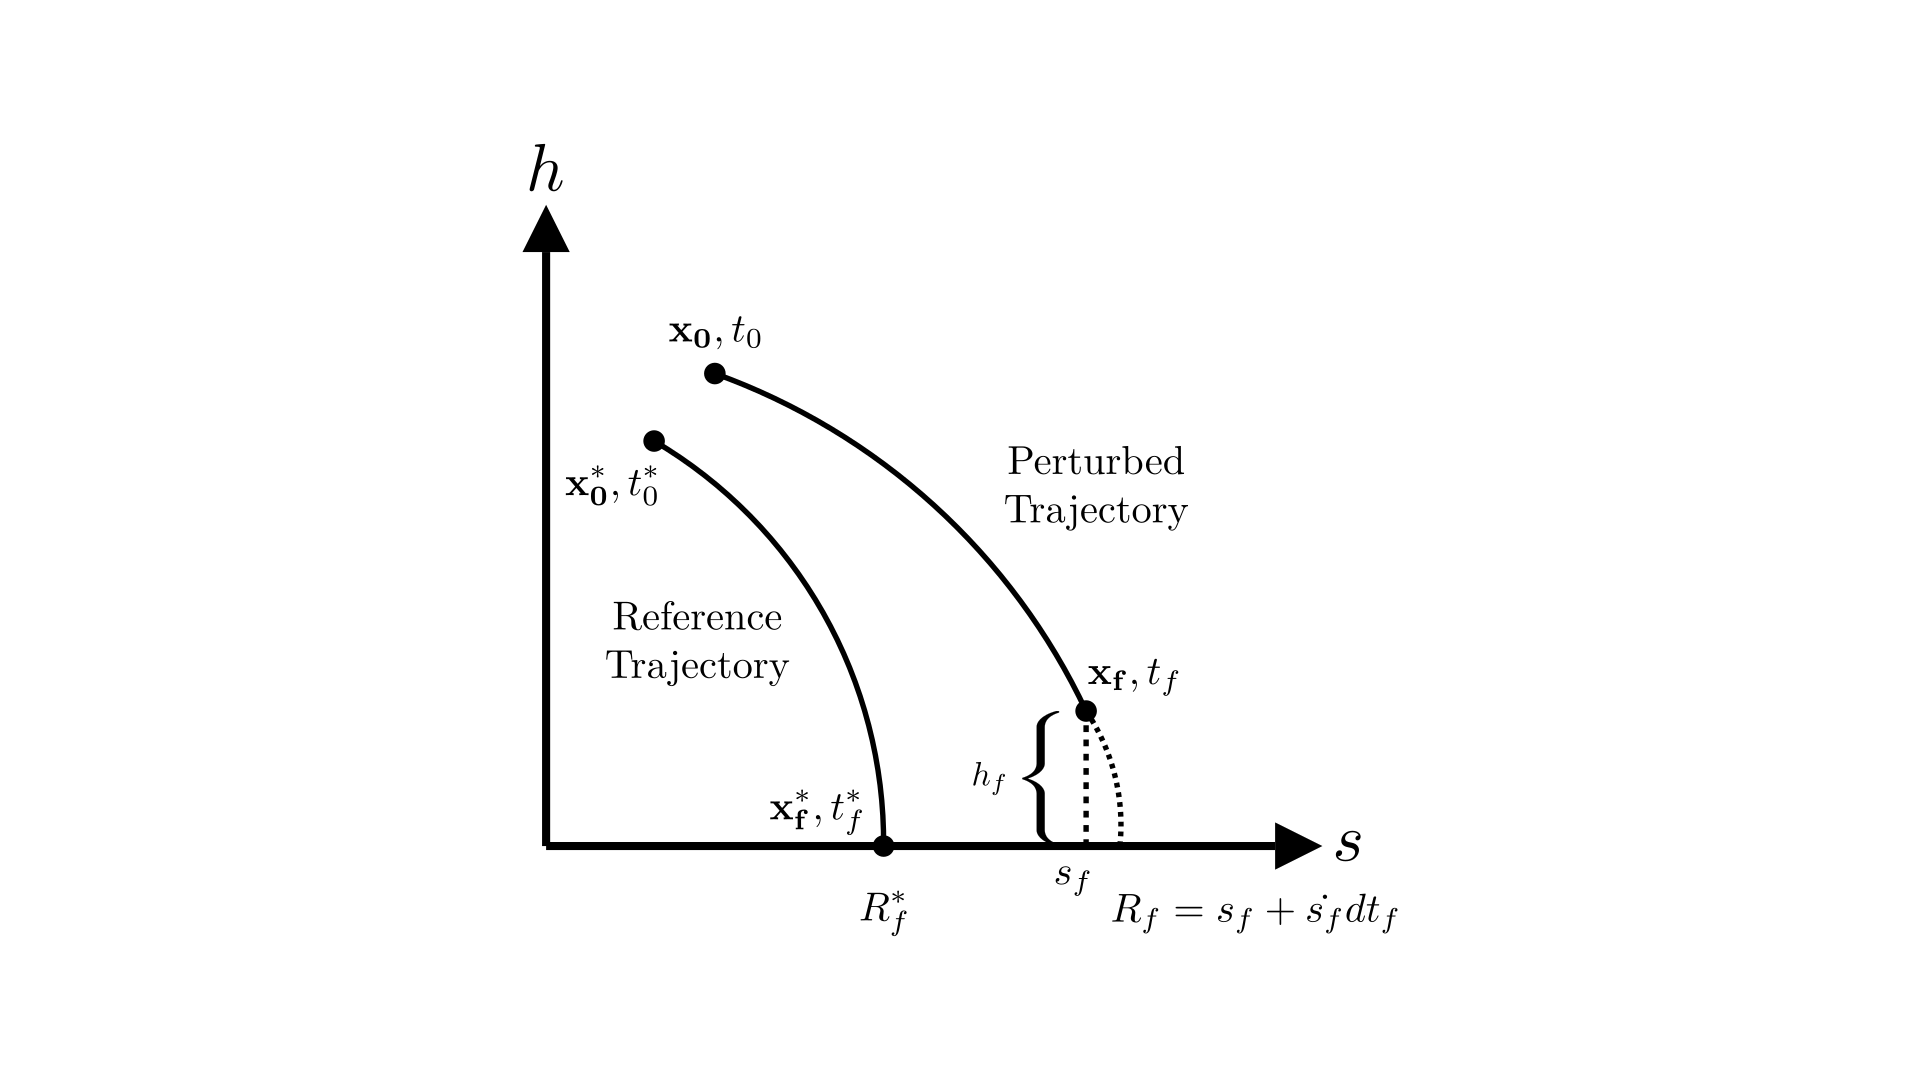

In [ ]:
%%manim ControlPolicy1_Derivation_Plot

from manim.mobject.geometry import ArrowTriangleFilledTip
from math import sin, cos, tan, pi


def make_ref_traj(x0, xf):
    ref_traj_t0 = Dot(x0)
    ref_traj_tf = Dot(xf)
    ref_traj = ArcBetweenPoints(x0, xf, angle=-TAU/6)
    ref_traj_t0_label = MathTex('\mathbf{x_0^*}, t_0^*') \
                                .scale(0.6) \
                                .next_to(ref_traj_t0, DL, 0) \
                                .shift((RIGHT+DOWN)*SMALL_BUFF)
    ref_traj_tf_label = MathTex('\mathbf{x_f^*}, t_f^*') \
                                .scale(0.6) \
                                .move_to(xf + MED_SMALL_BUFF*UL + MED_SMALL_BUFF*LEFT)
    ref_traj_Rf_label = MathTex('R_f^*') \
                                .scale(0.6) \
                                .next_to(ref_traj_tf, DOWN)
    ref_traj_label = Tex(r'Reference\\Trajectory') \
                        .scale(0.6) \
                        .next_to(ref_traj, LEFT) \
                        .shift(1.25*RIGHT)
    return Group(ref_traj_t0, 
                    ref_traj_t0_label,
                    ref_traj_tf,
                    ref_traj_tf_label, 
                    ref_traj_Rf_label, 
                    ref_traj,
                    ref_traj_label,
                    )

def make_pert_traj(x0, xf, xf_pred):
    traj_t0 = Dot(x0)
    traj_tf = Dot(xf)
    traj = ArcBetweenPoints(x0, xf, angle=-TAU/8)
    traj_t0_label = MathTex('\mathbf{x_0}, t_0') \
                                .scale(0.6) \
                                .next_to(traj_t0, UP, buff=SMALL_BUFF)
    traj_tf_label = MathTex('\mathbf{x_f}, t_f') \
                                .scale(0.6) \
                                .move_to(xf + MED_SMALL_BUFF*UR + SMALL_BUFF*RIGHT)
    traj_label = Tex(r'Perturbed\\Trajectory') \
                        .scale(0.6) \
                        .next_to(traj, RIGHT) \
                        .shift(0.75*LEFT + 0.5*UP) \
                        .shift(0.1 * DL)

    return Group(traj_t0, 
                    traj_t0_label,
                    traj_tf,
                    traj_tf_label, 
                    traj_label, 
                    traj
                    )

def make_pert_traj_tail(xf, xf_pred):
    hf_line = DashedLine(xf, xf+abs(xf[1])*DOWN)
    hf_brace = Brace(hf_line, LEFT, stroke_width=0.1)
    
    sf_label = MathTex('s_f') \
                    .scale(0.6) \
                    .next_to(hf_line, DOWN) \
                    .shift(UL*SMALL_BUFF)
    Rf_label = MathTex(r'R_f',r' = s_f + \dot{s_f} dt_f') \
                    .scale(0.6) \
                    .move_to(xf_pred + DOWN*MED_LARGE_BUFF + RIGHT)

    tail = DashedVMobject(ArcBetweenPoints(xf, xf_pred, angle=-TAU/9))
    return Group(hf_line,
                hf_brace,
                hf_brace.get_tex('h_f', buff=0.01).scale(0.5),
                sf_label,
                Rf_label,
                tail
    )

def make_axes(origin, s_len, h_len):
    h_axis = Arrow(origin+MED_SMALL_BUFF*DOWN, origin+h_len*UP)
    h_label = MathTex(r'h').next_to(h_axis, UP, SMALL_BUFF)
    s_axis = Arrow(origin+MED_SMALL_BUFF*LEFT, origin+s_len*RIGHT)
    s_label = MathTex(r's').next_to(s_axis, RIGHT, SMALL_BUFF)
    return Group(h_axis, s_axis), Group(h_label, s_label)


class ControlPolicy1_Derivation_Plot(Scene):
    config["background_color"] = WHITE
    def construct(self):
        axes, axes_labels = make_axes(ORIGIN+2*DOWN, 6, 5)

        # Make ref traj
        ref_traj_pts = [0.8*RIGHT+1*UP, 2.5*RIGHT+2*DOWN]
        ref_traj = make_ref_traj(*ref_traj_pts)

        # Make perturbed traj
        pert_traj_pts = [1.25*RIGHT+1.5*UP, 4*RIGHT+1*DOWN, 4.25*RIGHT+2*DOWN]
        
        pert_traj = make_pert_traj(*pert_traj_pts[:2], ORIGIN)
        traj_tail = make_pert_traj_tail(*pert_traj_pts[1:])

        diagram = Group(axes, axes_labels, ref_traj, pert_traj, traj_tail).set_color(BLACK)
        self.add(diagram.move_to(ORIGIN))